# Otimizadores do Gradiente Descendente

## Objetivos

Os objetivos deste notebook são:

* introduzir os conceitos básicos iniciais de redes neurais através da 
* otimização de um ajuste de pontos por uma reta (linear) utilizando a 
* técnica de cálculo numérico do gradiente descendente. 

É introduzido também:

* o uso de matrizes tanto como 
    * notação matemática como 
    * forma de programação. 

Este notebook contém:
* primeiros programas matriciais de redes neurais, 
* laço de otimização e 
* plotagem de gráficos.
* Primeiro programa em Keras

# Importação dos módulos

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Dados

In [45]:
W = np.array([[30,2]]) # bias e inclinação da reta
#x = np.array([28,73,94,53,40,2,13,20,81,99,24,58,69,36,15,76,66,90,92,57,11,1,55,70,23,20,84,56,31]).reshape(-1,1)
x = np.array([14,86,28,51,28,29,72,62,84,15,42,62,47,35,9,38,44,99,13,21,28,20,8,64,99,70,27,17,8]).reshape(-1,1)
X_bias = np.hstack([np.ones_like(x),x])
y = X_bias.dot(W.T)
print('x.shape:',x.shape)
print('y.shape:',y.shape)

x.shape: (29, 1)
y.shape: (29, 1)


## Visualização dos dados normalizados

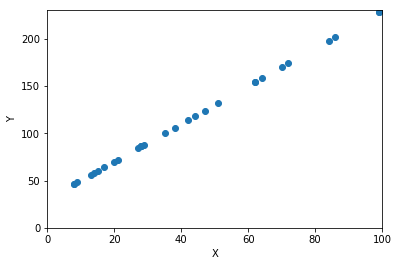

In [46]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,100)
plt.ylim(0,230)
plt.show()

## Código compute_cost

In [47]:
def compute_cost(X_b, y, wT):
    '''
    Compute cost for linear regression
    (X,y): amostras rotuladas X(n_samples,2) e y(n_samples,)
    wT: vetor coluna de parâmetros (já transposto)
       aceita tanto shape (2,1) Para um caso como (2,n_history) para n_history casos
    '''
    e = X_b.dot(wT) - y
    J = (e * e).mean(axis=0)
    return J

## Laço de minimização via gradiente descendente

O código da próxima célula é a parte principal deste notebook. É aqui que a minimização é feita. É aqui que dizemos que estamos fazendo o *fit*, ou o treinamento do sistema para encontrar o parâmetro $\mathbf{W}$ que minimiza a função de perda $J$. Acompanhamos a convergência da minimização pelo valor da perda a cada iteração, plotando o vetor `J_history`.

O esquema da otimização é representado pelo diagrama a seguir:

<img src="../figures/RegressaoLinear_Otimizacao.png",width = 600pt>

e é implementado pela próxima célula de código:

## Gradiente Descendente Estocástico com Mini-Batch

In [59]:

def stochastic_gradient_descent_mini(X, y, w_init, lr, n_epochs, batch_size, shuffle=False):
    '''
    Perform stochastic gradient descent to learn w
    by taking n_epochs times number of samples 
    gradient steps with learning rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    n = np.ceil(M/batch_size).astype(np.int)
    w_history = np.zeros((2,(n*n_epochs)+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    index = 0
    for i in range(n_epochs):
        if shuffle:
            ri = np.random.randint(M,size=M) # embaralhamento no início de cada época
            Xs = X[ri]
            ys = y[ri]
        else:
            Xs = X
            ys = y
        for jj in range(n):
            j = jj * batch_size
            grad = (Xs[j:j+batch_size,:].T).dot(Xs[j:j+batch_size,:].dot(wT) - ys[j:j+batch_size])
            #print('x:',Xs[j:j+batch_size,:])
            #print('grad:',grad)
            wT = wT - lr * (2.0 / batch_size) * grad
            w_history[:,index+1] = wT[:,0]
            index = index + 1
    return w_history.T

# Laço de minimização via gradiente descendente - Código

In [66]:
# Parâmetros do gradiente descendente: número de iterações e taxa de aprendizagem
iterations = 2000
lr = 0.0001

n_samples = y.shape[0]

w_init = np.array([[1.,1.]])

#w_history = batch_gradient_descent(X_bias, y, w_init, lr, iterations)
w_history = stochastic_gradient_descent_mini(X_bias, y, w_init, lr, iterations, 1)
#print(w_history[:30,:])

w_gd = w_history[::-1][0:1] # pega o último valor do gradiente descendente
print('w_gd:\n', w_gd)
print('final cost (gradiente descendente):', compute_cost(X_bias, y, w_gd.T))

J_history = compute_cost(X_bias, y, w_history.T)
print(J_history[:30])

w_gd:
 [[ 29.43278837   2.01202098]]
final cost (gradiente descendente): [ 0.11155176]
[ 5796.5862069   4932.38819596   726.30883201   766.48772966   420.32169023
   485.06264814   542.12052922   272.99509072   252.14460239   332.57145459
   278.70187172   248.8247371    249.22984398   255.38126936   286.66745237
   317.28121256   346.98213725   338.02566079  1029.39045018   826.29499871
   570.80633128   365.28930262   285.30056827   264.16271668   252.42782259
   534.03980404   262.77749307   249.36416418   268.68651088   290.15999683]


# Plot da curva de minimização de J com o número de iterações

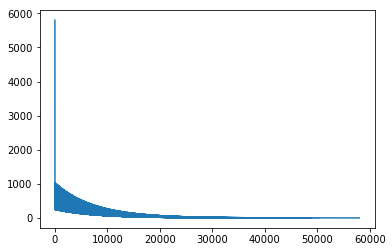

In [67]:
plt.plot(J_history) # mostrando log para amplificar valores baixos
#plt.ylim(0,1)
plt.show()

# Visualização do gradiente descendente no espaço de parâmetros - 2D

In [68]:
# Cálculo dos limites para gerar o espaço de parâmetros
def Jview_ex(X_bias, y, w_history):
    wmin = w_history.min(axis=0)
    wmax = w_history.max(axis=0)
    D = wmax - wmin
    wmin -= D
    wmax += D
    #print('wmin:', wmin)
    #print('wmax:', wmax)

    # Cálculo da matriz bidimensional de parâmetros
    xx, yy = np.meshgrid(np.linspace(wmin[0], wmax[0],100), np.linspace(wmin[1], wmax[1],100))
    w_grid = np.c_[xx.ravel(), yy.ravel()]
    #print(xx.shape)
    #print(w_grid.shape)
    #print(X_bias.shape)

    # Cálculo do J(w) para todos os w da matriz de parâmetros

    J_grid = compute_cost(X_bias, y, w_grid.T)

    # Plotagem de J na matriz de parâmetros
    J_grid = J_grid.reshape(xx.shape)
    plt.pcolormesh(xx, yy, J_grid, cmap=plt.cm.cool) #Paired)
    plt.contour(xx,yy,J_grid,10)

    # Plotagem dos pontos da sequência dos parâmetros durante o processo do gradiente descendente

    plt.scatter(w_history[:,0],w_history[:,1])
    #plt.scatter(w_opt[0],w_opt[1],marker='x', c='b') # Solução analítica
    plt.title('Visualização do treinamento de w na função de Custo J')
    plt.show()


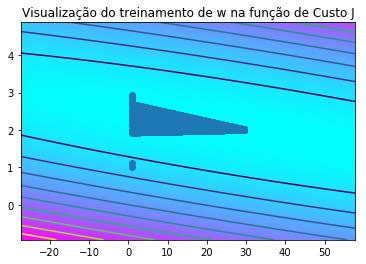

In [69]:
#from Jview import Jview

Jview_ex(X_bias, y, w_history)

# Visualização do gradiente descendente no espaço de parâmetros - 3D

## Jview3D - Exercício

In [18]:
def Jview3D_ex(X_bias, y, w_history, w_opt):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import cm

    wmin = w_history.min(axis=0)
    wmax = w_history.max(axis=0)
    D = wmax - wmin
    wmin -= D
    wmax += D
    # Cálculo da matriz bidimensional de parâmetros
    xx, yy = np.meshgrid(np.linspace(wmin[0], wmax[0],100), np.linspace(wmin[1], wmax[1],100))
    w_grid = np.c_[xx.ravel(), yy.ravel()]

    # Cálculo do J(w) para todos os w da matriz de parâmetros

    J_grid = compute_cost(X_bias, y, w_grid.T)

    # Plotagem de J na matriz de parâmetros
    J_grid = J_grid.reshape(xx.shape)

    fig = plt.figure(figsize=(35,17.75))
    ax = fig.add_subplot(111, projection='3d')

    #plota a superfcie 3D
    ax.plot_surface(xx, yy, J_grid, alpha=0.5, cmap=cm.coolwarm)
    ax.contour(xx,yy,J_grid,15)
    #Plota o historicos do vetor W
    ax.scatter(w_history[:,0],w_history[:,1],J_history, c='r',marker = 'o',s = 80)
    ax.scatter(w_opt[0],w_opt[1],marker='x', c='b',s = 80)
    ax.set_xlabel(r'$w_0$',fontsize = 35)
    ax.set_ylabel(r'$w_1$',fontsize = 35)
    ax.set_zlabel('Custo (J)',fontsize = 35);


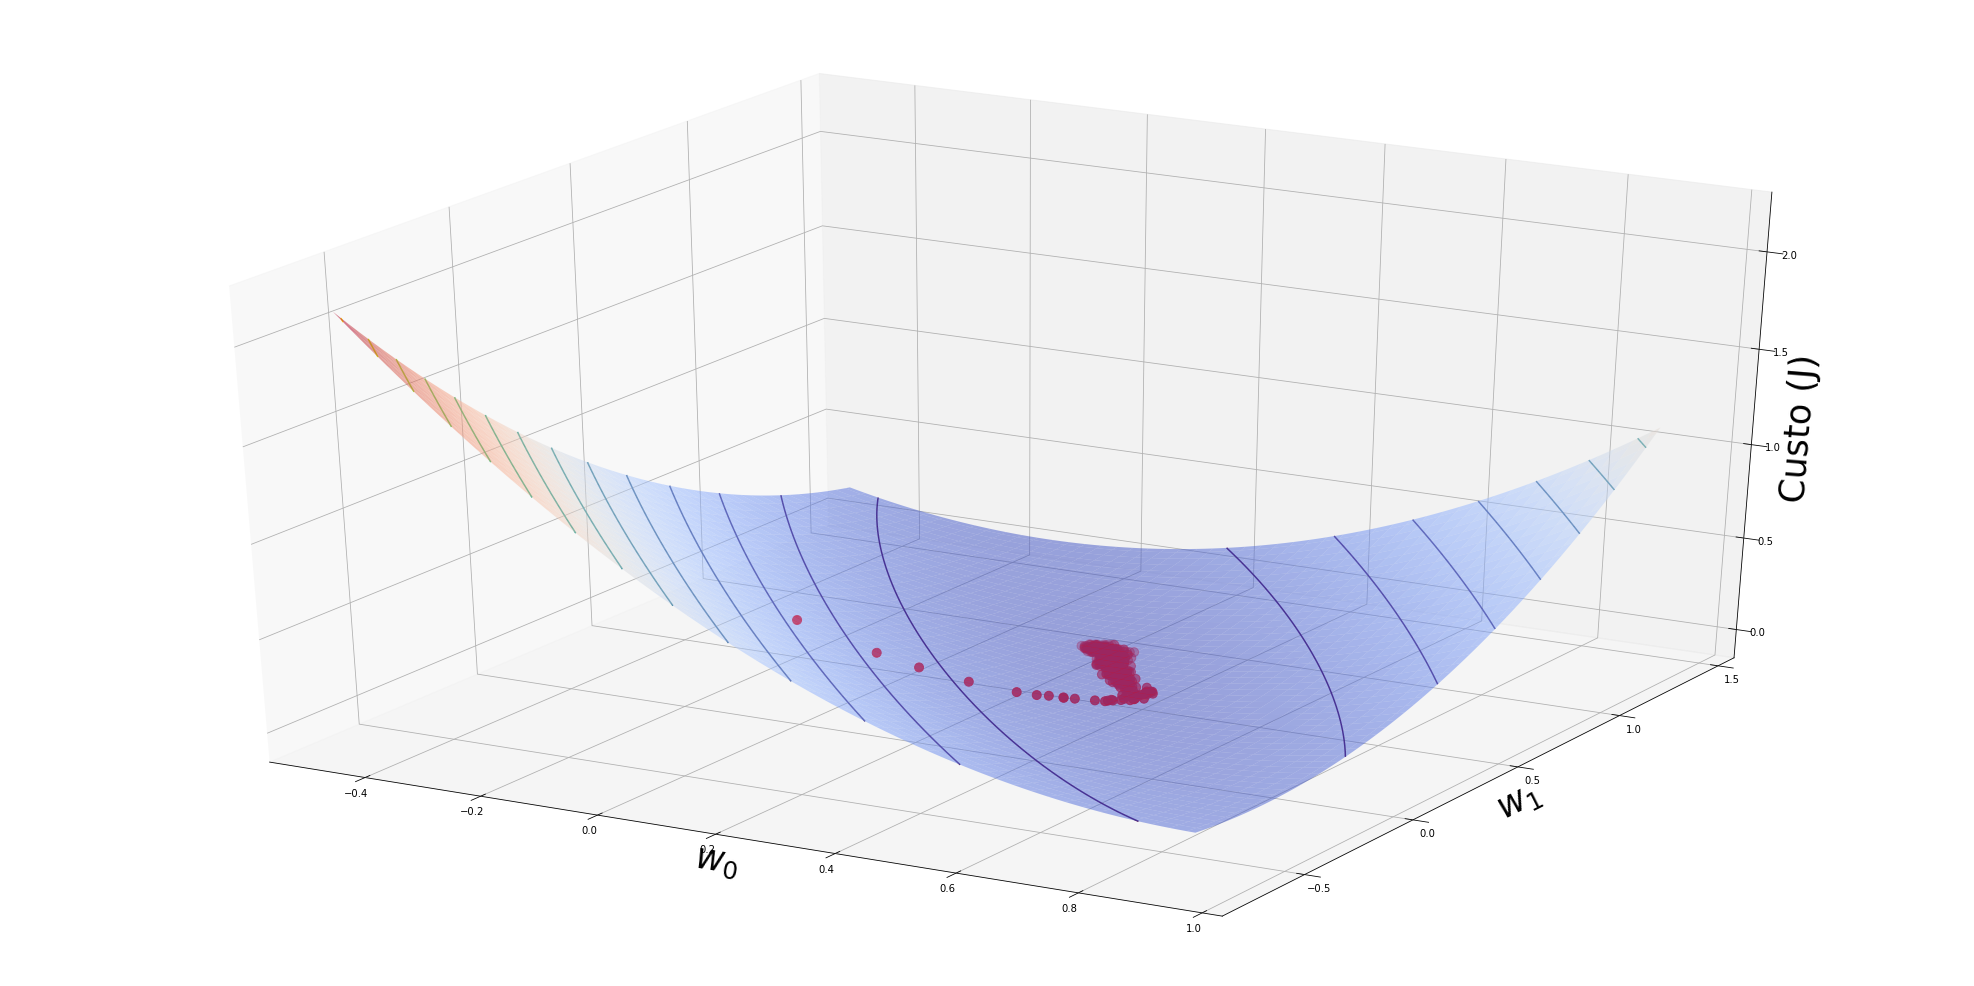

In [19]:
#from Jview import Jview3D

Jview3D_ex(X_bias, y, w_history, w_opt)
#Jview3DImpl(X_bias, y, w_history, w_opt)

# Conclusões desse experimento

Quais são as principais conclusões que podemos tirar deste experimento?

